In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def build_efficiency_plots(mean_values):
    fig = plt.figure()
    rt_subplt = fig.add_subplot(212)
    Sp_subplt = fig.add_subplot(221)
    Ep_subplt = fig.add_subplot(222)

    rt_subplt.set_title('runtime')
    rt_subplt.set_xlabel('threads')
    rt_subplt.set_ylabel('time')
    Sp_subplt.set_title('Speedup')
    Sp_subplt.set_xlabel('threads')
    Sp_subplt.set_ylabel("$S_{p}$")
    Ep_subplt.set_title('Efficiency')
    Ep_subplt.set_xlabel('threads')
    Ep_subplt.set_ylabel("$E_{p}$")

    for dimension in sorted(set(mean_values['steps'])):
        sub_df = mean_values.loc[mean_values.steps == dimension]
        one_thread_t = sub_df[sub_df.numThreads == 1]['duration'].astype(float)
        speedup = np.array(one_thread_t) / np.array(sub_df['duration'])
        efficiency = speedup / np.array(sub_df['numThreads'])

        rt_subplt.plot(sub_df['numThreads'], sub_df['duration'],
                       marker="o", label="{steps}".format(steps=dimension))

        Sp_subplt.plot(sub_df['numThreads'], speedup, marker=".",
                       label="{steps}".format(steps=dimension))

        Ep_subplt.plot(sub_df['numThreads'], efficiency,
                       marker=".", label="{steps}".format(steps=dimension))
    rt_subplt.legend()
    
    plt.plot(figsize=(20,10))
    plt.subplots_adjust(wspace=1, hspace=1)
    plt.show()

In [3]:
#load data
with open('result.json', 'r') as myfile:
    data=myfile.read()

file_data = json.loads(data)

In [4]:
# group results by methods
df_by_method = {m:pd.DataFrame([fd[m] for fd in file_data]) for m in file_data[0].keys()}

# set column names & count mean values for each set of params
for df in df_by_method:
    df_by_method[df].columns = ['numThreads','area','steps','error','duration']
    df_by_method[df] = df_by_method[df].groupby(['numThreads', 'steps'], as_index=False).mean()

In [5]:
df_by_method['Trapezium'].info()#[['numThreads','duration']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 5 columns):
numThreads    30 non-null int64
steps         30 non-null int64
area          30 non-null float64
error         30 non-null float64
duration      30 non-null float64
dtypes: float64(3), int64(2)
memory usage: 1.4 KB


Trapezium


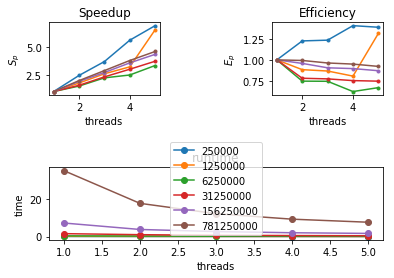

    numThreads      steps      area         error   duration
0            1     250000  1.113444  2.000000e-08   0.028592
1            1    1250000  1.113444  0.000000e+00   0.104229
2            1    6250000  1.113444  0.000000e+00   0.339323
3            1   31250000  1.113444  0.000000e+00   1.538974
4            1  156250000  1.113444  0.000000e+00   7.262675
5            1  781250000  1.113444  0.000000e+00  35.440880
6            2     250000  1.113444  2.000000e-08   0.011663
7            2    1250000  1.113444  0.000000e+00   0.058985
8            2    6250000  1.113444  0.000000e+00   0.227197
9            2   31250000  1.113444  0.000000e+00   0.985050
10           2  156250000  1.113444  0.000000e+00   3.790160
11           2  781250000  1.113444  0.000000e+00  17.843808
12           3     250000  1.113444  2.000000e-08   0.007719
13           3    1250000  1.113444  0.000000e+00   0.040056
14           3    6250000  1.113444  0.000000e+00   0.151828
15           3   3125000

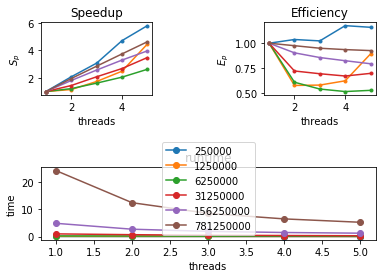

    numThreads      steps      area     error   duration
0            1     250000  1.113453  0.027253   0.014662
1            1    1250000  1.113445  0.005451   0.049913
2            1    6250000  1.113444  0.001090   0.210571
3            1   31250000  1.113444  0.000218   0.970293
4            1  156250000  1.113444  0.000044   4.858964
5            1  781250000  1.113444  0.000009  24.264996
6            2     250000  1.113453  0.027253   0.007067
7            2    1250000  1.113445  0.005451   0.043491
8            2    6250000  1.113444  0.001090   0.173656
9            2   31250000  1.113444  0.000218   0.674077
10           2  156250000  1.113444  0.000044   2.690703
11           2  781250000  1.113444  0.000009  12.443361
12           3     250000  1.113453  0.027253   0.004776
13           3    1250000  1.113445  0.005451   0.028807
14           3    6250000  1.113444  0.001090   0.130575
15           3   31250000  1.113444  0.000218   0.467420
16           3  156250000  1.11

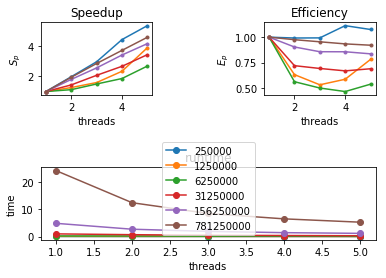

    numThreads      steps      area     error   duration
0            1     250000  1.113434  0.027253   0.013169
1            1    1250000  1.113442  0.005451   0.049733
2            1    6250000  1.113443  0.001090   0.195897
3            1   31250000  1.113443  0.000218   0.969756
4            1  156250000  1.113444  0.000044   4.852467
5            1  781250000  1.113444  0.000009  24.251869
6            2     250000  1.113434  0.027253   0.006640
7            2    1250000  1.113442  0.005451   0.039330
8            2    6250000  1.113443  0.001090   0.174086
9            2   31250000  1.113443  0.000218   0.673351
10           2  156250000  1.113444  0.000044   2.685327
11           2  781250000  1.113444  0.000009  12.435065
12           3     250000  1.113434  0.027253   0.004422
13           3    1250000  1.113442  0.005451   0.031142
14           3    6250000  1.113443  0.001090   0.130426
15           3   31250000  1.113443  0.000218   0.466689
16           3  156250000  1.11

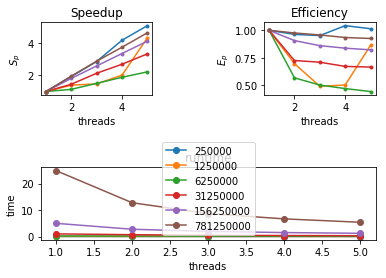

    numThreads      steps      area  error   duration
0            1     250000  1.113444    0.0   0.012457
1            1    1250000  1.113444    0.0   0.051136
2            1    6250000  1.113444    0.0   0.200543
3            1   31250000  1.113444    0.0   0.996925
4            1  156250000  1.113444    0.0   4.988077
5            1  781250000  1.113444    0.0  24.928972
6            2     250000  1.113444    0.0   0.006470
7            2    1250000  1.113444    0.0   0.036690
8            2    6250000  1.113444    0.0   0.176635
9            2   31250000  1.113444    0.0   0.687334
10           2  156250000  1.113444    0.0   2.751735
11           2  781250000  1.113444    0.0  12.777121
12           3     250000  1.113444    0.0   0.004363
13           3    1250000  1.113444    0.0   0.034691
14           3    6250000  1.113444    0.0   0.133128
15           3   31250000  1.113444    0.0   0.468187
16           3  156250000  1.113444    0.0   1.932533
17           3  781250000  1

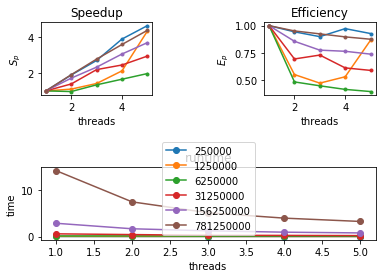

    numThreads      steps      area  error   duration
0            1     250000  1.113444    0.0   0.006713
1            1    1250000  1.113444    0.0   0.029197
2            1    6250000  1.113444    0.0   0.114660
3            1   31250000  1.113444    0.0   0.577043
4            1  156250000  1.113444    0.0   2.855186
5            1  781250000  1.113444    0.0  14.204366
6            2     250000  1.113444    0.0   0.003559
7            2    1250000  1.113444    0.0   0.026570
8            2    6250000  1.113444    0.0   0.119048
9            2   31250000  1.113444    0.0   0.416256
10           2  156250000  1.113444    0.0   1.668135
11           2  781250000  1.113444    0.0   7.465167
12           3     250000  1.113444    0.0   0.002490
13           3    1250000  1.113444    0.0   0.020682
14           3    6250000  1.113444    0.0   0.085718
15           3   31250000  1.113444    0.0   0.263842
16           3  156250000  1.113444    0.0   1.229013
17           3  781250000  1

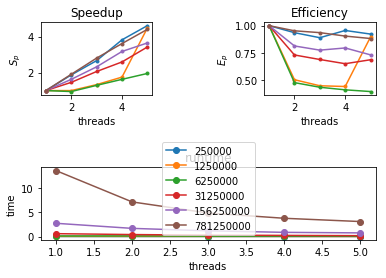

    numThreads      steps      area  error   duration
0            1     250000  1.113446    0.0   0.006125
1            1    1250000  1.113444    0.0   0.027878
2            1    6250000  1.113444    0.0   0.108254
3            1   31250000  1.113444    0.0   0.582561
4            1  156250000  1.113444    0.0   2.707764
5            1  781250000  1.113444    0.0  13.498461
6            2     250000  1.113446    0.0   0.003275
7            2    1250000  1.113444    0.0   0.027894
8            2    6250000  1.113444    0.0   0.114460
9            2   31250000  1.113444    0.0   0.399728
10           2  156250000  1.113444    0.0   1.667113
11           2  781250000  1.113444    0.0   7.086581
12           3     250000  1.113446    0.0   0.002298
13           3    1250000  1.113444    0.0   0.020940
14           3    6250000  1.113444    0.0   0.083928
15           3   31250000  1.113444    0.0   0.282720
16           3  156250000  1.113444    0.0   1.167064
17           3  781250000  1

In [6]:
for df in df_by_method:
    print(df)
    build_efficiency_plots(df_by_method[df])
    print(df_by_method[df].groupby(['numThreads', 'steps'], as_index=False).mean())